<a href="https://colab.research.google.com/github/hugosdef/APRENDIZAJE_AUTOMATICO_23_24/blob/main/P_Final_Capstone_Grupo5_Eurosat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.ufv.es/wp-content/uploads/2023/03/logo-UFV-scaled.jpg" alt="Logo de Colab" width="200">

# **Práctica Final Capstone**
## **Grupo 5**
###**Autores:**
- Hugo Santos de Felipe
- David Marín Sala

In [28]:
!pip install pydot graphviz


In [30]:
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau

##**INTRODUCCIÓN**

Este proyecto se enfoca en el análisis y clasificación de imágenes satelitales, una tarea importante en el ámbito de la teledetección. La teledetección, que implica la observación y el análisis de la superficie terrestre utilizando sensores remotos, tiene un papel vital en numerosos campos, como la monitorización ambiental, la planificación urbana y la gestión de recursos naturales.

El dataset seleccionado para este proyecto es Eurosat, accesible a través de TensorFlow Datasets (TFDS). Eurosat se deriva del programa Copernicus Sentinel-2 de la Unión Europea, conocido por su alta calidad y precisión en la captura de imágenes satelitales. Consta de 27,000 imágenes que representan diversas coberturas terrestres, ofreciéndonos una base sólida para el entrenamiento y la evaluación de modelos de aprendizaje automático.

El uso de Eurosat en este proyecto está motivado por su importancia en la teledetección y la diversidad en la representación de características terrestres. Estas características hacen que Eurosat sea un conjunto de datos que nos interesa para explorar técnicas avanzadas de clasificación de imágenes y aprendizaje profundo.

Un trabajo académico relevante que subraya la importancia de este tipo de datos es el de Helber et al., en "EuroSAT: A Novel Dataset and Deep Learning Benchmark for Land Use and Land Cover Classification" (IEEE Journal of Selected Topics in Applied Earth Observations and Remote Sensing, 2019). Este estudio destaca la utilidad del dataset Eurosat para el entrenamiento de redes neuronales convolucionales, una técnica para la clasificación de imágenes en AP que será central en nuestro proyecto.

##**FUENTES DE DATOS**

El dataset **Eurosat** utilizado en este proyecto proviene de TensorFlow Datasets (**TFDS**), una biblioteca que facilita el acceso a una amplia gama de datasets estandarizados y listos para usar en aprendizaje automático. **Eurosat**, específicamente, está basado en **imágenes capturadas por el satélite Sentinel-2**, parte del programa **Copernicus de la Unión Europea**, que se dedica a la observación de la Tierra.

###**TAMAÑO Y CONFIABILIDAD DE EUROSAT**

El conjunto de datos **Eurosat** es relativamente grande, con **27,000 imágenes satelitales etiquetadas**. Cada imagen representa diferentes tipos de superficies terrestres, como ríos, ciudades, bosques, etc. La **fuente del dataset**, el programa **Copernicus Sentinel-2**, es reconocida por su confiabilidad y precisión, lo que nos asegura que la calidad de los datos utilizados para el proyecto es adecuada.

###**RAZONAMIENTO DETRÁS DE LA SELECCIÓN DEL DATASET**

La **elección de Eurosat** para este proyecto se basa en varios factores:

**Relevancia para la Teledetección**: Eurosat ofrece un campo de prueba excelente para técnicas de clasificación de imágenes satelitales, una aplicación crucial en la teledetección.

**Diversidad de Características Terrestres**: El amplio rango de coberturas terrestres en Eurosat permite explorar y probar la eficacia de modelos de aprendizaje automático en un entorno variado.


###**MÉTODO DE RECUPERACIÓN DE LOS DATOS**

Los datos fueron recuperados de la siguiente manera:

Utilizamos la función **tfds.load** para cargar el dataset Eurosat. Este método es eficiente y directo, facilitándonos el acceso a los datos ya preprocesados.

In [3]:
eurosat_dataset, eurosat_info = tfds.load('eurosat/rgb', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/eurosat/rgb/2.0.0.incomplete1KY9UR/eurosat-train.tfrecord*...:   0%|      …

Dataset eurosat downloaded and prepared to /root/tensorflow_datasets/eurosat/rgb/2.0.0. Subsequent calls will reuse this data.


##**FORMATO DE LOS DATOS**

Imprimimos la información del conjunto de datos Eurosat utilizando eurosat_info.

Esta información incluye detalles esenciales sobre el conjunto de datos, como el número total de ejemplos, las características de las imágenes, las etiquetas disponibles y otros metadatos relevantes.

Imprimir esta información nos proporciona una visión general de las características clave del conjunto de datos Eurosat.

In [4]:
# Imprimimos la información del conjunto de datos
print(eurosat_info)

tfds.core.DatasetInfo(
    name='eurosat',
    full_name='eurosat/rgb/2.0.0',
    description="""
    EuroSAT dataset is based on Sentinel-2 satellite images covering 13 spectral
    bands and consisting of 10 classes with 27000 labeled and
    geo-referenced samples.
    
    Two datasets are offered:
    - rgb: Contains only the optical R, G, B frequency bands encoded as JPEG image.
    - all: Contains all 13 bands in the original value range (float32).
    
    URL: https://github.com/phelber/eurosat
    """,
    config_description="""
    Sentinel-2 RGB channels
    """,
    homepage='https://github.com/phelber/eurosat',
    data_dir=PosixGPath('/tmp/tmpbcdygm6ctfds'),
    file_format=tfrecord,
    download_size=89.91 MiB,
    dataset_size=89.50 MiB,
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=string),
        'image': Image(shape=(64, 64, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('ima

La razón por la que no accedemos a una división de "**test**" en el conjunto de datos Eurosat es porque, en la mayoría de las versiones estándar de Eurosat en TensorFlow Datasets, solo existe una división única denominada '**train**'. Esto significa que el conjunto de datos **no viene pre-dividido** en conjuntos separados para entrenamiento y pruebas.

In [5]:
# Accedemos a la división de entrenamiento
full_dataset = eurosat_dataset['train']

Determinamos el número total de imágenes del conjunto de datos.

In [6]:
# Determinamos el tamaño del conjunto de datos
dataset_size = eurosat_info.splits['train'].num_examples
print(f"Número total de imágenes: {dataset_size}")

Número total de imágenes: 27000


###**TAMAÑO DE LOS FUTUROS CONJUNTOS DE ENTRENAMIENTO Y PRUEBA**

A continuación, determinamos el número de datos de entrenamiento y de test(prueba) para nuestro conjunto de datos.

 Establecemos que el 20% de los datos totales serán destinados a datos de test.

In [37]:
# Tamaño para entrenamiento y prueba
train_size = int(0.8 * dataset_size)
test_size = dataset_size - train_size
print(f"Número total de imágenes de entrenamiento: {train_size}")
print(f"Número total de imágenes de test: {test_size}")


Número total de imágenes de entrenamiento: 21600
Número total de imágenes de test: 5400


###**CUANTAS Y QUE CLASES HAY**

En el siguiente fragmento de código, obtenemos información sobre las clases: cuántas hay en total y el nombre de las mismas.

In [38]:
# Número de clases
num_classes = eurosat_info.features['label'].num_classes
print(f"Número de clases: {num_classes}")

label_names = eurosat_info.features['label'].names  # Nombres correspondientes a las etiquetas numéricas
print("Nombres de las clases en Eurosat:")
for i, label_name in enumerate(label_names):
    print(f"Clase {i}: {label_name}")

Número de clases: 10
Nombres de las clases en Eurosat:
Clase 0: AnnualCrop
Clase 1: Forest
Clase 2: HerbaceousVegetation
Clase 3: Highway
Clase 4: Industrial
Clase 5: Pasture
Clase 6: PermanentCrop
Clase 7: Residential
Clase 8: River
Clase 9: SeaLake


###**DIVISIÓN EN ENTRENAMIENTO Y PRUEBA Y CONVERSIÓN A NUMPY**

**train_dataset:** Este subconjunto contiene el 80% del dataset total. Se utiliza para entrenar el modelo, permitiéndole aprender las características y patrones de las imágenes.

**test_dataset:** Este subconjunto, compuesto por el 20% restante del dataset, se utiliza para evaluar el rendimiento del modelo. Nos ayuda a entender cómo el modelo se desempeña con datos no vistos durante el entrenamiento.

**Conversión a Arrays de NumPy**

El siguiente paso es convertir estos subconjuntos en arrays de NumPy. NumPy es una biblioteca de Python ampliamente utilizada en la ciencia de datos y aprendizaje automático por su eficiencia y facilidad de uso, especialmente para la manipulación de matrices y arrays multidimensionales.

**to_numpy():** Esta función toma un conjunto de datos (como train_dataset o test_dataset) y lo convierte en dos arrays de NumPy: uno para las imágenes y otro para las etiquetas.

**Las imágenes son almacenadas en un array de NumPy**, proporcionando una estructura adecuada para el procesamiento y análisis de imágenes en modelos de aprendizaje automático.

**Las etiquetas**, que indican la categoría a la que pertenece cada imagen, **también se convierten en un array de NumPy**, facilitándonos su uso en el entrenamiento y la evaluación de modelos.

In [25]:
# Dividimos el dataset en entrenamiento y prueba
train_dataset = eurosat_dataset['train'].take(train_size)
test_dataset = eurosat_dataset['train'].skip(train_size)

# Función para convertir a NumPy arrays
def to_numpy(dataset):
    images = []
    labels = []
    for image, label in tfds.as_numpy(dataset):
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)

# Convertimos a NumPy arrays
train_images, train_labels = to_numpy(train_dataset)
test_images, test_labels = to_numpy(test_dataset)

###**SHAPE DE LOS CONJUNTOS DE NUESTRO DATASET**

En el siguiente código, obtenemos y mostramos las dimensiones (forma) de los arrays de imágenes y etiquetas de los conjuntos de entrenamiento y prueba, lo que nos ofrece una visión clara del tamaño y la estructura de estos conjuntos de datos.







In [39]:
# Obtenemos la forma de los arrays
train_images_shape = train_images.shape
train_labels_shape = train_labels.shape
test_images_shape = test_images.shape
test_labels_shape = test_labels.shape

# Mostramos las formas
print("Forma de las imágenes de entrenamiento:", train_images_shape)
print("Forma de las etiquetas de entrenamiento:", train_labels_shape)
print("Forma de las imágenes de prueba:", test_images_shape)
print("Forma de las etiquetas de prueba:", test_labels_shape)


Forma de las imágenes de entrenamiento: (21600, 64, 64, 3)
Forma de las etiquetas de entrenamiento: (21600,)
Forma de las imágenes de prueba: (5400, 64, 64, 3)
Forma de las etiquetas de prueba: (5400,)


La salida muestra que el conjunto de entrenamiento consta de 21,600 imágenes, cada una de 64x64 píxeles y 3 canales de color (RGB), con etiquetas correspondientes para cada imagen. El conjunto de prueba tiene 5,400 imágenes con la misma resolución y formato de color.

###**RANGO LOS DE PÍXELES EN LAS IMÁGENES**

Este código calcula y muestra el rango de valores de píxeles en los arrays de imágenes de entrenamiento y prueba. El rango está determinado por los valores mínimo y máximo de píxeles en las imágenes, lo cual es importante para entender la naturaleza de los datos de imagen y puede ser relevante para el preprocesamiento, como la normalización.

In [11]:
# Información adicional como el rango de los datos
print("Rango de valores en las imágenes de entrenamiento:", train_images.min(), "-", train_images.max())
print("Rango de valores en las imágenes de prueba:", test_images.min(), "-", test_images.max())

Rango de valores en las imágenes de entrenamiento: 0 - 255
Rango de valores en las imágenes de prueba: 4 - 255


Efectivamente esto nos sugiere que hay que normalizar las imágenes diviendo los valores de píxeles entre 255 lo que nos asegura que se encuentren en un intervalo de [0 1].

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Comprobamos que hayan quedado correctamente divididas y normalizadas ejecutando otra vez la línea de codigo para obtener el rango de valores de los píxeles de las imágenes. Ahora deberían de estar entre 0 y 1.

In [13]:
print("Rango de valores en las imágenes de entrenamiento:", train_images.min(), "-", train_images.max())
print("Rango de valores en las imágenes de prueba:", test_images.min(), "-", test_images.max())

Rango de valores en las imágenes de entrenamiento: 0.0 - 1.0
Rango de valores en las imágenes de prueba: 0.01568627450980392 - 1.0


###**DISTRIBUCIÓN CLASES EN EL DATASET**

Este código calcula y muestra la distribución de las clases en los conjuntos de entrenamiento y prueba del dataset Eurosat.

Utiliza np.unique para contar cuántas veces aparece cada etiqueta en ambos conjuntos, y luego mapea estos conteos a los nombres de las etiquetas correspondientes.

Esto proporciona una visión clara de cuántas imágenes de cada categoría (como "Bosque", "Río", "Autopista", etc.) están presentes, lo cual es esencial para entender el equilibrio del dataset y planificar estrategias de entrenamiento efectivas.

In [40]:

unique_train, counts_train = np.unique(train_labels, return_counts=True)
unique_test, counts_test = np.unique(test_labels, return_counts=True)

# Nombres de las clases
label_names = ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway", "Industrial",
               "Pasture", "PermanentCrop", "Residential", "River", "SeaLake"]

# Mapeando los conteos a los nombres de las etiquetas para el conjunto de entrenamiento
train_label_distribution = {label_names[label]: count for label, count in zip(unique_train, counts_train)}

# Mapeando los conteos a los nombres de las etiquetas para el conjunto de prueba
test_label_distribution = {label_names[label]: count for label, count in zip(unique_test, counts_test)}

# Imprimiendo la distribución de etiquetas para ambos conjuntos
print("Distribución de clases en el conjunto de entrenamiento:")
for label, count in train_label_distribution.items():
    print(f"Clase '{label}': {count} imágenes")

print("\nDistribución de clases en el conjunto de prueba:")
for label, count in test_label_distribution.items():
    print(f"Clase '{label}': {count} imágenes")


Distribución de clases en el conjunto de entrenamiento:
Clase 'AnnualCrop': 2427 imágenes
Clase 'Forest': 2425 imágenes
Clase 'HerbaceousVegetation': 2379 imágenes
Clase 'Highway': 1996 imágenes
Clase 'Industrial': 1999 imágenes
Clase 'Pasture': 1603 imágenes
Clase 'PermanentCrop': 1996 imágenes
Clase 'Residential': 2392 imágenes
Clase 'River': 1989 imágenes
Clase 'SeaLake': 2394 imágenes

Distribución de clases en el conjunto de prueba:
Clase 'AnnualCrop': 573 imágenes
Clase 'Forest': 575 imágenes
Clase 'HerbaceousVegetation': 621 imágenes
Clase 'Highway': 504 imágenes
Clase 'Industrial': 501 imágenes
Clase 'Pasture': 397 imágenes
Clase 'PermanentCrop': 504 imágenes
Clase 'Residential': 608 imágenes
Clase 'River': 511 imágenes
Clase 'SeaLake': 606 imágenes


Aunque hay ligeras variaciones en el número de imágenes por clase, todas están razonablemente bien representadas. Esto es importante para evitar el sesgo hacia clases específicas y asegurar que el modelo pueda aprender y generalizar efectivamente sobre todos los tipos de terrenos y características representadas en las imágenes.

###**MUESTRA DE UNA IMAGEN ALEATORIA DE CADA CLASE**

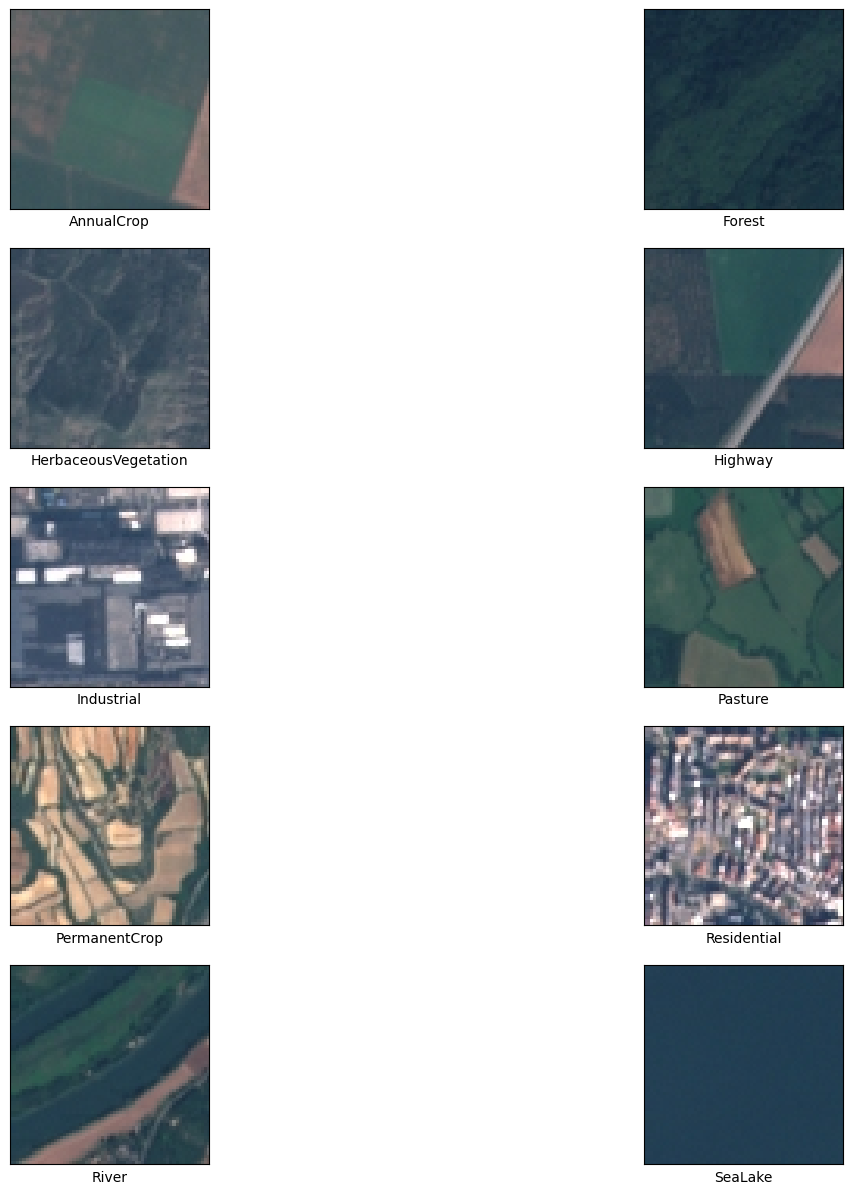

In [26]:
def show_random_image_per_class(images, labels, label_names):
    """Muestra una imagen aleatoria de cada clase."""
    unique_labels = set(labels)

    plt.figure(figsize=(15, 15))
    for i, label in enumerate(unique_labels):
        # Encontrando índices de todas las imágenes con la etiqueta actual
        indices = [index for index, l in enumerate(labels) if l == label]

        # Escogiendo una imagen aleatoria de esta clase
        random_index = random.choice(indices)
        image = images[random_index]

        # Mostrando la imagen
        plt.subplot(5, 2, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image)
        plt.xlabel(label_names[label])
    plt.show()

# Ejemplo de uso:
show_random_image_per_class(train_images, train_labels, label_names)

###**BARAJADO DEL DATASET**

Barajeamos aleatoriamente los conjuntos de entrenamiento y prueba. Esto asegura que los datos estén bien mezclados, previniendo cualquier sesgo que pudiera introducirse si los datos estuvieran en un orden específico.

Después del barajado, obtenemos y mostramos la forma de los arrays de imágenes y etiquetas de ambos conjuntos.

 Esto es para confirmar que las dimensiones de los datos siguen siendo correctas después de la mezcla, asegurando así la integridad de los datos para el entrenamiento y la evaluación del modelo.

In [41]:
# Barajando aleatoriamente los datos de entrenamiento
train_images, train_labels = shuffle(train_images, train_labels, random_state=0)

# Barajando aleatoriamente los datos de prueba
test_images, test_labels = shuffle(test_images, test_labels, random_state=0)

# Obtenemos la forma de los arrays
train_images_shape = train_images.shape
train_labels_shape = train_labels.shape
test_images_shape = test_images.shape
test_labels_shape = test_labels.shape

# Mostramos las formas
print("Forma de las imágenes de entrenamiento:", train_images_shape)
print("Forma de las etiquetas de entrenamiento:", train_labels_shape)
print("Forma de las imágenes de prueba:", test_images_shape)
print("Forma de las etiquetas de prueba:", test_labels_shape)

Forma de las imágenes de entrenamiento: (21600, 64, 64, 3)
Forma de las etiquetas de entrenamiento: (21600,)
Forma de las imágenes de prueba: (5400, 64, 64, 3)
Forma de las etiquetas de prueba: (5400,)


###**CONVERSIÓN ETIQUETAS A ONE-HOT**

Este fragmento de código convierte las etiquetas de los conjuntos de entrenamiento y prueba a formato one-hot encoding, una representación binaria para la clasificación en aprendizaje automático.

Posteriormente, se verifica y muestra la forma de las nuevas etiquetas one-hot para confirmar que la conversión se ha realizado correctamente.

In [42]:
# Convirtiendo las etiquetas a one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Puedes verificar las formas de las nuevas etiquetas para asegurarte de que la conversión fue exitosa
print("Forma de las etiquetas de entrenamiento en one-hot:", train_labels.shape)
print("Forma de las etiquetas de prueba en one-hot:", test_labels.shape)

Forma de las etiquetas de entrenamiento en one-hot: (21600, 10)
Forma de las etiquetas de prueba en one-hot: (5400, 10)


###**DIVISIÓN DEL CONJUNTO ENTRENAMIENTO EN ENTRENAMIENTO Y VALIDACIÓN**

**Conjunto de Entrenamiento Parcial (partial_x_train, partial_y_train):** Este conjunto incluye las primeras 18,000 imágenes y sus etiquetas correspondientes del conjunto de entrenamiento original. Este subconjunto lo utilizaremos para entrenar el modelo.

**Conjunto de Validación (x_val, y_val):** Este conjunto consiste en las últimas 3,600 imágenes y etiquetas del conjunto de entrenamiento original, desde la imagen 18,000 hasta la 21,600. Este subconjunto se utiliza para validar el rendimiento del modelo durante el entrenamiento, permitiéndonos ajustar hiperparámetros y evitar el sobreajuste.

In [43]:
x_val = train_images[18000:21600]
partial_x_train = train_images[:18000]

y_val = train_labels[18000:21600]
partial_y_train = train_labels[:18000]

##**MODELOS**

In [44]:
input_shape = (64, 64, 3)
num_classes = 10

###**MODELO INICIAL**


Este modelo inicial es una red neuronal convolucional (CNN) simple, diseñada para clasificar nuestras imágenes en las 10 categorías.

Comienza con dos capas convolucionales consecutivas, sin capas de reducción de tamaño (MaxPooling) o Dropout entre ellas.

Tras aplanar los datos, sigue una capa densa con activación ELU para introducir no linealidades en el modelo y que pueda aprender características mas específicas y luego una capa densa final con activación softmax para la clasificación.

Este modelo se entrena con un tamaño de lote de 400 y durante 30 épocas, utilizando un conjunto de validación para la comprobación del rendimiento.

Lo consideramos una buena base para empezar a explorar el rendimiento de las redes CNN para resolver nuestro problema.

In [ ]:


model2 = Sequential()

model2.add(Conv2D(32, (5, 5), activation='relu', input_shape=input_shape))

model2.add(Conv2D(64, (5, 5), activation='relu'))

model2.add(Flatten())

model2.add(Dense(64, activation='elu'))

model2.add(Dense(num_classes, activation='softmax'))

model2.summary()

model2.compile(loss='categorical_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])


history2 = model2.fit(partial_x_train, partial_y_train,
                      batch_size=400,
                      epochs=75,
                      validation_data=(x_val, y_val),
                      verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        51264     
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 64)                12845120  
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 12899466 (49.21 MB)
Trainable params: 12899466 (49.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/75
45/

####**GRÁFICA PÉRDIDA**

Representamos una visualización esencial para entender el comportamiento y la eficacia de nuestro modelo a lo largo del proceso de entrenamiento y validación con la gráfica de pérdida. Mediante el seguimiento de las métricas 'Pérdida de Entrenamiento' y 'Pérdida de Validación', somos capaces de observar cómo evoluciona el aprendizaje del modelo en cada época.

Esta visualización no solo sirve para evaluar el rendimiento del modelo, sino que también sirve como una herramienta para identificar problemas como el sobreajuste. Si la pérdida de entrenamiento disminuye mientras que la de validación aumenta, esto podría indicar que el modelo se está ajustando demasiado a los datos de entrenamiento y no generalizando bien a nuevos datos.

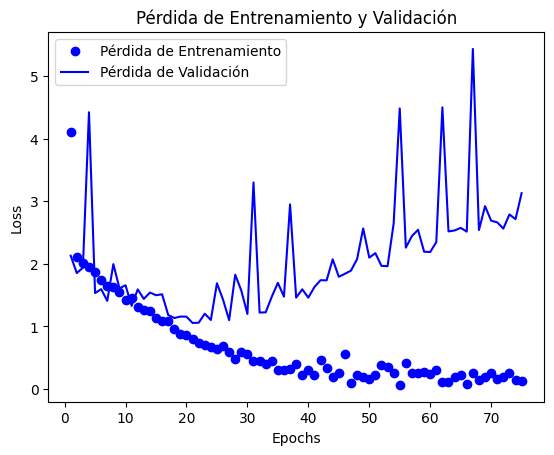

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azul"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


####**GRÁFICA PRECISIÓN**

Continuando con la evaluación del modelo, se muestra la gráfica de precisión, con la que podemos comprender la capacidad predictiva de nuestro modelo a lo largo de las distintas fases de entrenamiento y validación. La precisión, que indica el porcentaje de predicciones correctas, es una métrica clave para evaluar la efectividad de cualquier modelo de clasificación.

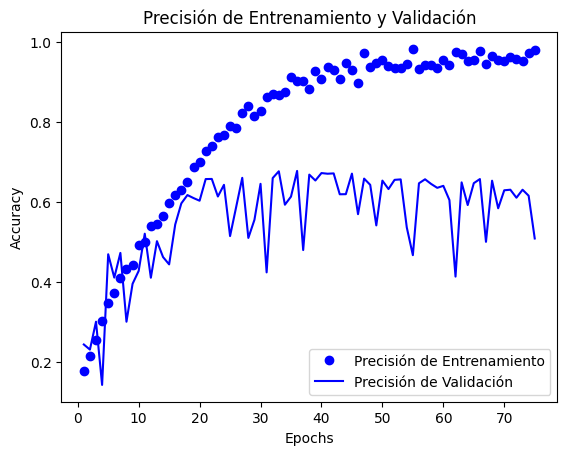

In [ ]:

plt.clf()   # Limpia la figura
acc_values = history2.history['accuracy']
val_acc_values = history2.history['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc_values, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



Las gráficas muestra una clara diferencia entre la precisión y pérdida de entrenamiento y la de validación, indicando un sobreajuste del modelo.

La precisión de entrenamiento es notablemente más alta, lo que sugiere que el modelo se desempeña bien con los datos que ha visto durante el entrenamiento, pero no generaliza de la misma manera con nuevos datos.

Además, la volatilidad en la precisión de validación apunta a una falta de estabilidad en el modelo, lo que podría ser resultado de una tasa de aprendizaje muy alta o una falta de regularización.

Estos signos nos resaltan la necesidad de ajustar el modelo para mejorar su capacidad de generalización y obtener una mayor consistencia en las predicciones.

###**MODELO INICIAL INCORPORANDO IMAGEDATAGENERATOR**

Para seguir progresando, mejoramos nuestro modelo principal utilizando ImageDataGenerator para la ampliación de datos, una técnica clave para aumentar la diversidad y cantidad efectiva de imágenes de entrenamiento. Este enfoque ayuda a prevenir el sobreajuste y mejora la generalización del modelo.

Con ImageDataGenerator, aplicamos transformaciones como rotación (20 grados), desplazamiento horizontal y vertical (20%), y volteo horizontal y vertical. Estas variaciones introducen robustez, permitiendo que el modelo aprenda de imágenes con cambios geométricos.

In [21]:
datagen = ImageDataGenerator(
    rotation_range=20,  # rango de rotación (20 grados)
    width_shift_range=0.2,  # desplazamiento horizontal
    height_shift_range=0.2,  # desplazamiento vertical
    horizontal_flip=True,  # volteo horizontal
    vertical_flip=True  # volteo vertical
)

In [ ]:
# Definiendo el modelo

model3 = Sequential()

model3.add(Conv2D(32, (5, 5), activation='relu', input_shape=input_shape))
model3.add(MaxPooling2D((2, 2)))

model3.add(Conv2D(64, (5, 5), activation='relu'))
model3.add(MaxPooling2D((2, 2)))

model3.add(Flatten())

model3.add(Dense(num_classes, activation='softmax'))

model3.summary()

model3.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Entrenando el modelo con data augmentation
history3 = model3.fit(datagen.flow(partial_x_train, partial_y_train, batch_size=200),
                      epochs=75,
                      validation_data=(x_val, y_val),
                      verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 10)               

Se vuelven a presentar tanto la Gráfica de Perdida como la Gráfica de Precisión para poder comparar nuestras mejoras en función del modelo inicial. Como se puede observar claramente la mejora es notable.

En cada nuevo modelo que se cree, se presentarán estas graficas.

####**GRÁFICA PÉRDIDA**


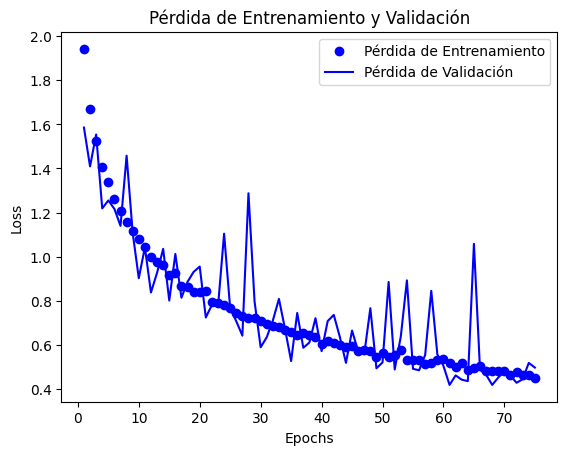

In [ ]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azul"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


####**GRAFICA PRECISIÓN**

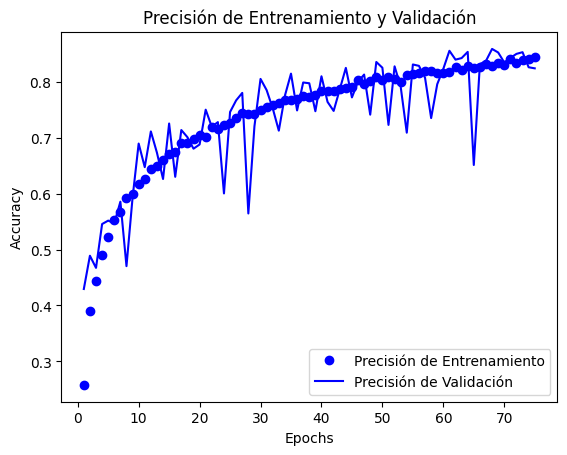

In [ ]:

plt.clf()   # Limpia la figura
acc_values = history3.history['accuracy']
val_acc_values = history3.history['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc_values, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

 La incorporación de Data Augmentation ha tenido un efecto positivo, haciendo que el modelo sea más robusto y mejore su capacidad de generalización. La precisión y pérdida de validación ahora sigue más de cerca a la precisión de entrenamiento a lo largo de las épocas, lo que nos sugiere que el modelo es más consistente y fiable al tratar con datos no vistos previamente.

### **MODELO 2**


En este nuevo modelo, se introducen varias modificaciones respecto al anterior para mejorar su capacidad de generalización y reducir el sobreajuste:

- **Padding 'same'**: Se añade padding en las capas convolucionales para mantener el tamaño de los mapas de características, asegurando que la red pueda aprender de los bordes de las imágenes.

- **Capa Adicional de Convolución y Dropout**: Se introduce una tercera capa convolucional con Dropout del 30%. Esto ayuda a que el modelo aprenda características más complejas y proporciona regularización, reduciendo el sobreajuste.

- **Mayor número de Neuronas en la Capa Densa**: Se incrementa el número de neuronas en la penúltima capa densa a 128, y se utiliza la función de activación 'elu', permitiendo al modelo capturar mejor la complejidad de los datos

In [ ]:
# Definiendo el modelo

model4 = Sequential()

model4.add(Conv2D(32, (5, 5), activation='relu', input_shape=input_shape, padding='same'))
model4.add(MaxPooling2D((2, 2)))

model4.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Dropout(0.30))

model4.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model4.add(MaxPooling2D((2, 2)))

model4.add(Flatten())

model4.add(Dense(128, activation='elu'))


model4.add(Dense(num_classes, activation='softmax'))

model4.summary()

model4.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Entrenando el modelo con data augmentation
history4 = model4.fit(datagen.flow(partial_x_train, partial_y_train, batch_size=200),
                      epochs=75,
                      validation_data=(x_val, y_val),
                      verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)       

####**GRÁFICA PERDIDA**

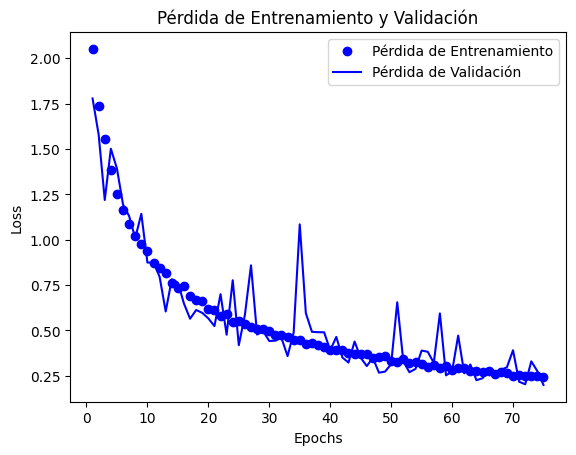

In [ ]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azul"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


####**GRÁFICA PRECISIÓN**

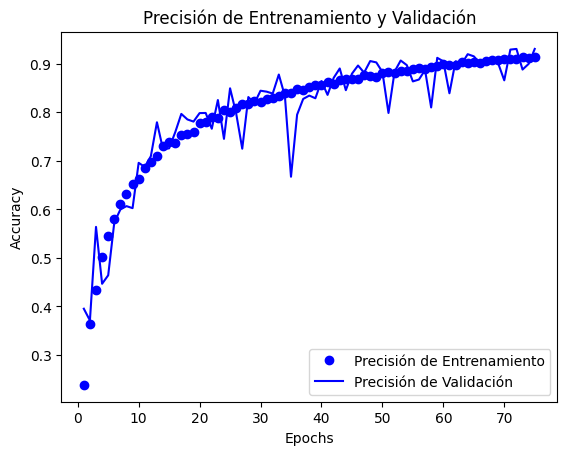

In [ ]:

plt.clf()   # Limpia la figura
acc_values = history4.history['accuracy']
val_acc_values = history4.history['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc_values, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

La precisión y pérdida de validación ahora son más estables y se mantienen en  proximidad con la precisión de entrenamiento a lo largo de todas las épocas. Este comportamiento nos sugiere que el modelo está generalizando mejor y es más estable en términos de rendimiento en el conjunto de validación, lo cual es un signo claro de un ajuste efectivo y una mejora en la capacidad predictiva del modelo.

###**MODELO 3**

Continuando con el trabajo de encontrar el mejor modelo posible, realizaremos uno nuevos con una serie de mejoras.

En el modelo, introducimos varias actualizaciones significativas para mejorar su capacidad de aprendizaje y robustez:

- **Mayor profundidad de filtros**: Las primeras capas convolucionales ahora tienen 64 filtros y las posteriores 128, aumentando la capacidad del modelo para capturar características más complejas.

- **Capas adicionales de convolución y pooling**: Se añaden más capas convolucionales y de pooling con 'padding' igual a 'same', lo que permite al modelo procesar más niveles de abstracción manteniendo las dimensiones.

- **Incremento en la regularización**: Se utiliza Dropout del 30% después de ciertas capas convolucionales para prevenir el sobreajuste, asegurando que el modelo generalice mejor.

- **Mayor número de neuronas en la capa densa**: La penúltima capa densa ahora tiene 256 neuronas con activación 'elu', brindando al modelo una mayor capacidad para aprender patrones complejos.

In [ ]:
# Definiendo el modelo

model5 = Sequential()

model5.add(Conv2D(64, (5, 5), activation='relu', input_shape=input_shape, padding='same'))
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.30))

model5.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model5.add(MaxPooling2D((2, 2)))


model5.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.30))

model5.add(Flatten())

model5.add(Dense(256, activation='elu'))


model5.add(Dense(num_classes, activation='softmax'))

model5.summary()

model5.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Entrenando el modelo con data augmentation
history5 = model5.fit(datagen.flow(partial_x_train, partial_y_train, batch_size=200),
                      epochs=75,
                      validation_data=(x_val, y_val),
                      verbose=1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 64, 64, 64)        4864      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        102464    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)      

####**GRÁFICA PERDIDA**

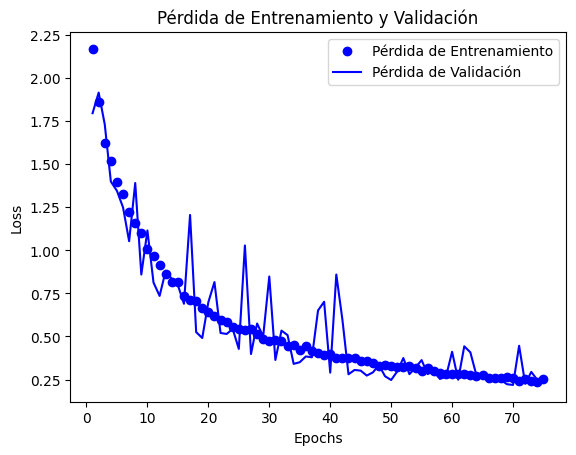

In [ ]:
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azul"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

####**GRAFICA PRECISIÓN**

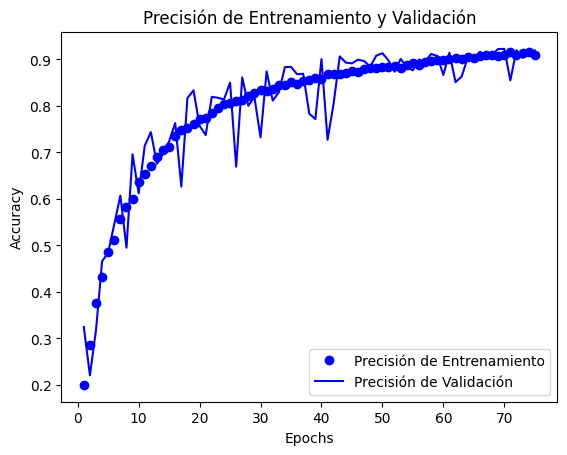

In [ ]:

plt.clf()   # Limpia la figura
acc_values = history5.history['accuracy']
val_acc_values = history5.history['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc_values, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Comparando estas gráfics con las anteriores, se observan que el modelo mantiene un rendimiento similar en términos de precisión.

No obstante, el sobreajuste parece haberse reducido ligeramente, como lo indica una menor brecha entre las líneas de precisión y pérdida de entrenamiento y validación, particularmente en las últimas épocas.

###**MODELO 4**

El modelo 3 ya tenía resultados bastante decentes, sin embargo sabiamos que se podia mejorar aun es precisión.

Por ello, en el nuevo modelo, se introducen ajustes significativos para ampliar la capacidad y precisión del modelo.

- **Incremento en filtros de las capas convolucionales**: Las primeras capas ahora usan 128 filtros y las siguientes 256, lo que permite al modelo capturar una gama más amplia de características visuales complejas.

- **Tamaño de kernel variado**: Se utilizan kernels de tamaño (3,3) y (5,5), lo que permite al modelo ser sensible a patrones de diferentes escalas y complejidades.

- **Mayor profundidad y regularización**: Se añaden más capas convolucionales y de pooling, junto con Dropout del 30%, para aumentar la capacidad de aprendizaje del modelo mientras se controla el sobreajuste.

- **Aumento significativo en neuronas de capa densa**: La capa densa ahora tiene 1024 neuronas con activación 'elu', proporcionando una vasta capacidad para sintetizar las características aprendidas en predicciones complejas.

- **Cambio en el tamaño de batch y epochs en entrenamiento**: Se ajusta el tamaño de batch a 150 y se mantiene en 75 epochs, buscando un equilibrio entre rendimiento y tiempo de entrenamiento.

In [45]:
# Definiendo el modelo

model6 = Sequential()

model6.add(Conv2D(128, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model6.add(MaxPooling2D((2, 2)))

model6.add(Conv2D(128, (5, 5), activation='relu', input_shape=input_shape, padding='same'))
model6.add(MaxPooling2D((2, 2)))

model6.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.30))

model6.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model6.add(MaxPooling2D((2, 2)))


model6.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.30))

model6.add(Flatten())

model6.add(Dense(1024, activation='elu'))


model6.add(Dense(num_classes, activation='softmax'))

model6.summary()

model6.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Entrenando el modelo con data augmentation
history6 = model6.fit(datagen.flow(partial_x_train, partial_y_train, batch_size=150),
                      epochs=75,
                      validation_data=(x_val, y_val),
                      verbose=1)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 32, 32, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 128)       409728    
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 16, 16, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 16, 256)       819456    
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 8, 8, 256)        

####**GRÁFICA PÉRDIDA**

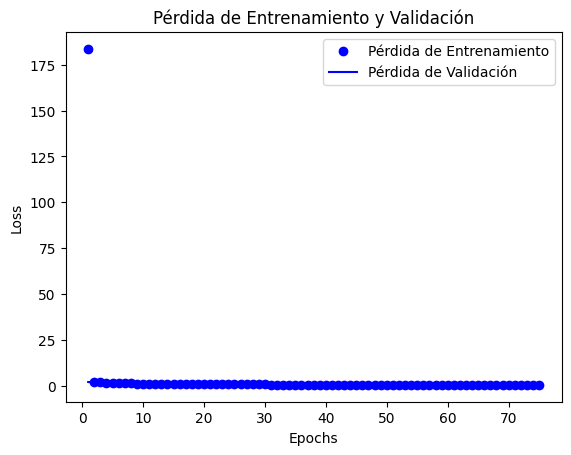

In [46]:
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']
loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azul"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

####**GRÁFICA PRECISIÓN**

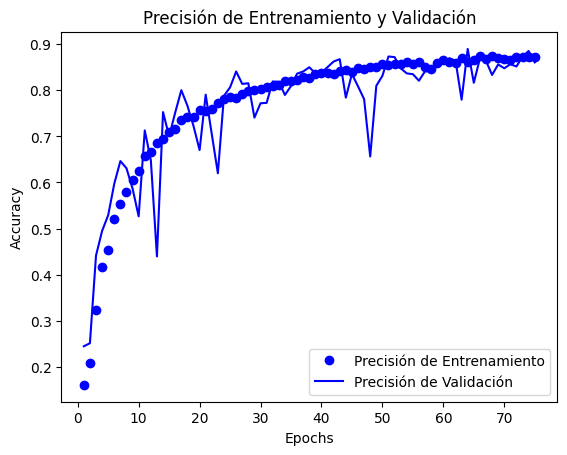

In [47]:
plt.clf()   # Limpia la figura
acc_values = history6.history['accuracy']
val_acc_values = history6.history['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc_values, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

La gráfica actual muestra una mayor variabilidad y una brecha más amplia entre entrenamiento y validación, indicando un posible aumento en el sobreajuste respecto al modelo anterior. Ajustaremos el modelo para mejorar la estabilidad y el rendimiento general.

###**MODELO FINAL**

Para finalizar, presentamos el modelo final el cual representa el máximo conseguido de nuestras iteraciones y mejoras, incorporando técnicas avanzadas y ajustes precisos para maximizar su rendimiento y exactitud en la clasificación de imágenes satelitales:

- **Filtros y Profundidad Mejorados**: Continuamos con 128 y 256 filtros en capas convolucionales, permitiendo al modelo captar una amplia gama de características visuales con gran detalle.

- **Regularización y Prevención de Sobreajuste**: Se mantiene el Dropout del 30% en puntos clave para asegurar que el modelo generalice bien y no memorice los datos de entrenamiento.

- **Capacidad Aumentada en la Capa Densa**: Con 1024 neuronas en la capa densa, el modelo tiene una capacidad considerable para combinar las características aprendidas y realizar clasificaciones precisas.

- **Optimizador y Ajuste Dinámico del Aprendizaje**: Se utiliza RMSprop como optimizador con un learning rate inicial de 0.001. Además, se introduce un callback de ReduceLROnPlateau para ajustar dinámicamente la tasa de aprendizaje durante el entrenamiento, asegurando que el modelo converja de manera eficiente a una solución óptima.

- **Entrenamiento Riguroso con Data Augmentation**: Se continúa el entrenamiento con imágenes aumentadas para promover la robustez y generalización del modelo.

In [48]:
# Definición de la arquitectura del modelo
model1 = Sequential()

model1.add(Conv2D(128, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.30))

model1.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.30))

model1.add(Flatten())

model1.add(Dense(1024, activation='elu'))

model1.add(Dense(num_classes, activation='softmax'))

# Resumen del modelo
model1.summary()

# Configuración del optimizador RMSprop
optimizer = RMSprop(learning_rate=0.001)

# Compilación del modelo
model1.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Callback para reducir la tasa de aprendizaje
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=0.0001, mode='max', threshold=0.90)

# Entrenamiento del modelo con data augmentation
history1 = model1.fit(datagen.flow(partial_x_train, partial_y_train, batch_size=150),
                      epochs=75,
                      validation_data=(x_val, y_val),
                      verbose=1,
                      callbacks=[reduce_lr])


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 32, 32, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 32, 32, 128)       409728    
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 16, 16, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 16, 16, 256)       819456    
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 8, 8, 256)        

####**GRÁFICA PÉRDIDA**

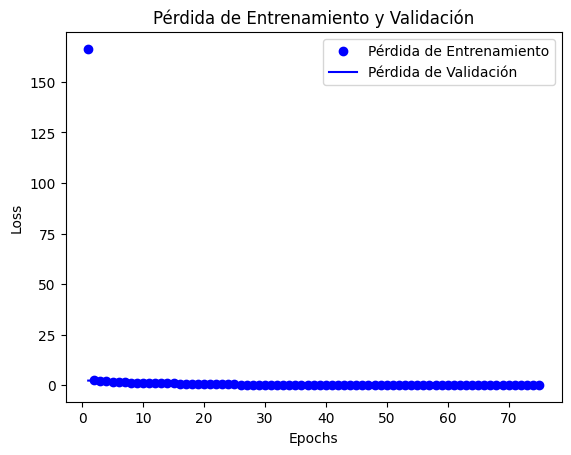

In [49]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azul"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


####**GRÁFICA PRECISIÓN**

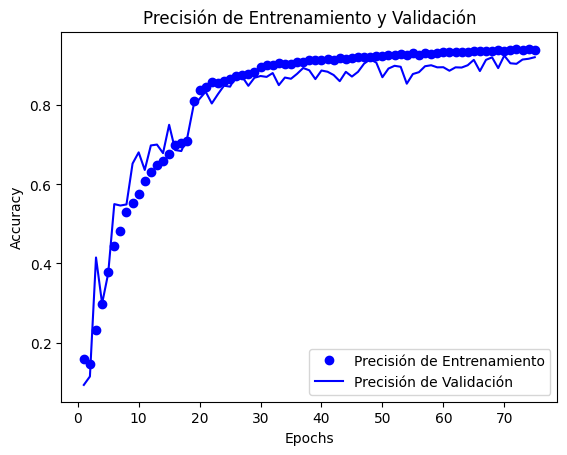

In [50]:

plt.clf()   # Limpia la figura
acc_values = history1.history['accuracy']
val_acc_values = history1.history['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc_values, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


###**COMPARACIÓN DE TODOS LOS MODELOS**

Como ya hemos estado explicando durante todo el trabajo, para desarrollar el modelo más efectivo para clasificar imágenes satelitales, hemos experimentado con varias arquitecturas y estrategias, resultando en seis modelos distintos. Cada uno de estos modelos ha sido una etapa en nuestro trabajo hacia una mejor precisión y comprensión. Para evaluar y comparar el rendimiento de estos modelos, nos hemos centrado en dos métricas: la precisión máxima y la mínima pérdida de validación.

Hemos extraído la precisión máxima y la mínima pérdida de validación de los tres modelos más complejos. Estos valores nos dan una idea clara de cómo cada modelo se comporta con respecto a los datos no vistos, con una precisión más alta y una pérdida más baja indicando un mejor rendimiento.

Para visualizar y comparar estos valores, hemos creado dos gráficos de barras. El primero muestra la máxima precisión de validación alcanzada por cada modelo de los complejos. Aquí, buscamos barras más altas, que indican una mayor proporción de imágenes correctamente clasificadas en el conjunto de validación. El segundo gráfico muestra la mínima pérdida de validación de cada modelo complejo, donde barras más bajas representan mejores modelos en términos de un menor error al hacer predicciones sobre datos nuevos.

Estos gráficos no solo resaltan cuál de nuestros modelos tiene el mejor rendimiento general, sino que también nos permite ver graficamente la evolución y las mejoras en nuestras técnicas de modelado a lo largo del trabajo.

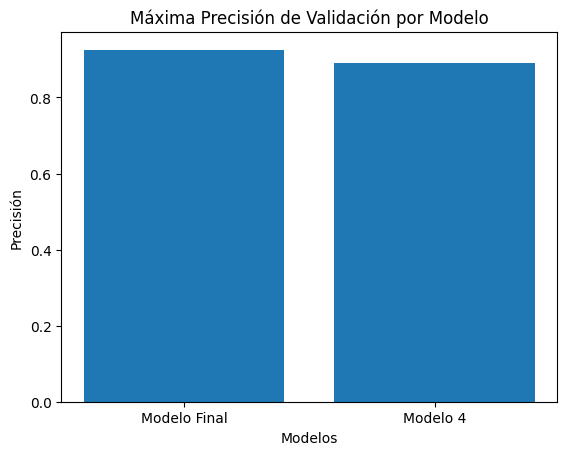

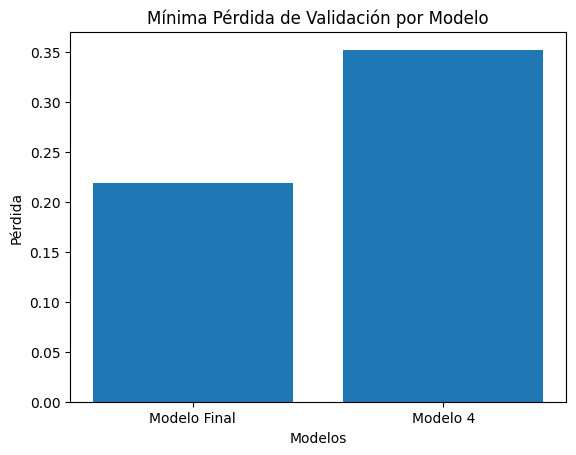

In [54]:
# Extraemos los valores máximos y mínimos de precisión y pérdida de validación
max_val_accuracies = []
min_val_losses = []

# Suponiendo que tienes objetos de history llamados history1, history2, ..., history6
histories = [history1,  history6]

for history in histories:
    # Accede al diccionario 'history' dentro del objeto 'History'
    val_accuracy = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    # Ahora sí puedes subscriptar para obtener los valores máximos y mínimos
    max_val_accuracies.append(max(val_accuracy))
    min_val_losses.append(min(val_loss))

# Ahora puedes usar max_val_accuracies y min_val_losses para crear gráficos
# Por ejemplo, un gráfico de barras para las precisiones máximas de validación
plt.bar(range(len(max_val_accuracies)), max_val_accuracies)
plt.title('Máxima Precisión de Validación por Modelo')
plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.xticks(range(len(max_val_accuracies)), ['Modelo Final', 'Modelo 4'])
plt.show()

# Y otro para las pérdidas mínimas de validación
plt.bar(range(len(min_val_losses)), min_val_losses)
plt.title('Mínima Pérdida de Validación por Modelo')
plt.xlabel('Modelos')
plt.ylabel('Pérdida')
plt.xticks(range(len(min_val_losses)), ['Modelo Final', 'Modelo 4'])
plt.show()

####**EVALUACIÓN MODELO FINAL CON LOS DATOS DE TEST**

Con nuestro modelo óptimo, ahora vamos a dar el paso de probarlo con nuestros datos de test. Este paso es fundamental porque nos proporcionará una evaluación honesta y no sesgada del rendimiento real del modelo.

In [55]:
# Definición de la arquitectura del modelo
model1 = Sequential()

model1.add(Conv2D(128, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(128, (5, 5), activation='relu', padding='same'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.30))

model1.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.30))

model1.add(Flatten())

model1.add(Dense(1024, activation='elu'))

model1.add(Dense(num_classes, activation='softmax'))

# Resumen del modelo
model1.summary()

# Configuración del optimizador RMSprop
optimizer = RMSprop(learning_rate=0.001)

# Compilación del modelo
model1.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# Callback para reducir la tasa de aprendizaje
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=0.0001, mode='max', threshold=0.90)

# Entrenamiento del modelo con data augmentation
history1 = model1.fit(datagen.flow(partial_x_train, partial_y_train, batch_size=150),
                      epochs=70,
                      validation_data=(x_val, y_val),
                      verbose=1,
                      callbacks=[reduce_lr])

test_loss, test_acc = model1.evaluate(test_images, test_labels)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 32, 32, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 32, 32, 128)       409728    
                                                                 
 max_pooling2d_46 (MaxPooli  (None, 16, 16, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 16, 16, 256)       819456    
                                                                 
 max_pooling2d_47 (MaxPooli  (None, 8, 8, 256)        

####**PÉRDIDA Y PRECISIÓN CON DATOS DE TEST**

In [56]:
test_loss, test_acc
print(f'Pérdida en el conjunto de prueba: {test_loss}')
print(f'Precisión en el conjunto de prueba: {test_acc * 100:.2f}%')

Pérdida en el conjunto de prueba: 0.2519018352031708
Precisión en el conjunto de prueba: 91.80%


####**MATRIZ DE CONFUSIÓN MODELO FINAL**

La matriz de confusión es una herramienta para evaluar el rendimiento de un modelo de clasificación. Es una tabla que muestra la relación entre las etiquetas verdaderas de los datos y las etiquetas que el modelo ha predicho. Cada fila de la matriz representa las instancias en una clase real, mientras que cada columna representa las instancias en una clase predicha.

En este caso, la matriz de confusión se calcula comparando las etiquetas verdaderas de tus datos de validación (true_classes) con las etiquetas que el modelo model1 ha predicho (predicted_classes).

Al revisar la matriz, podemos identificar no solo qué tan bien está funcionando el modelo en general, sino también en qué clases específicas es más fuerte o más débil. Esto puede ayudarnos a entender las tendencias en los errores del modelo y a tomar las decisiones oportunas.

113/113 [==============================] - 1s 6ms/step


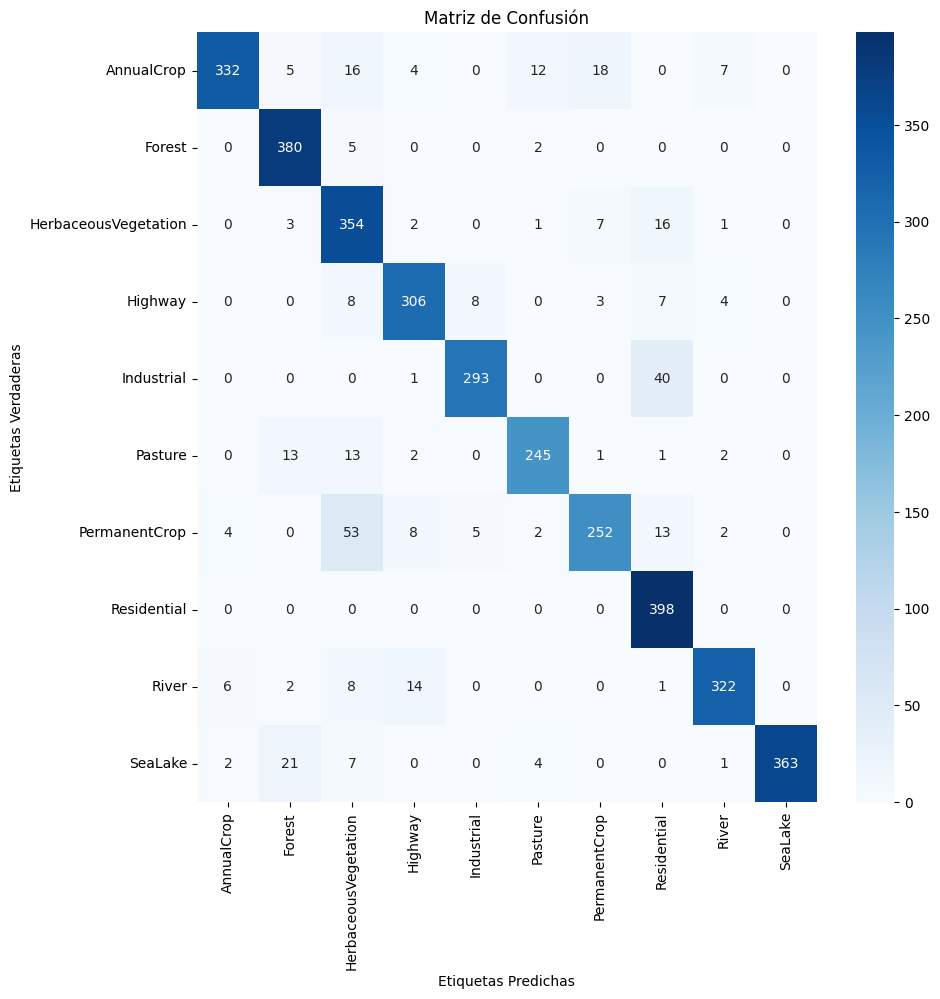

In [57]:

# Primero, obtenemos las predicciones del modelo
predictions = model1.predict(x_val)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_val, axis=1)

# Calculamos la matriz de confusión
cm = confusion_matrix(true_classes, predicted_classes)

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.title("Matriz de Confusión")
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Etiquetas Predichas')
plt.show()


####**PREDICCIONES**

#####**FUNCIÓN PREDICCIONES**

La función **predicciones** nos ayuda en la evaluación y validación de nuestro modelo de clasificación de imágenes. Esta función ha sido diseñada para interpretar y presentar los resultados generados por el modelo. Su principal objetivo es analizar las probabilidades asignadas a cada clase por el modelo para una imagen dada.

Al proporcionar las predicciones del modelo, el índice de la imagen específica en cuestión y las clases de nuestra bbdd, la función predicciones cumple dos funciones:

 Primero, imprime las probabilidades calculadas por el modelo para cada clase, lo que nos permite ver cómo el modelo percibe y clasifica la imagen.

 Segundo, identifica y comunica la clase que el modelo considera más probable.

Su aplicación en esta práctica es fundamental para identificar áreas de mejora.

In [58]:
def predicciones(predictions, numeroimagen, label_names):
    print("\nLA LISTA DE PROBABILIDADES DE SER CADA ELEMENTO ES:")
    print(predictions[numeroimagen])

    indice_prediccion = np.argmax(predictions[numeroimagen])
    clase_prediccion = label_names[indice_prediccion]
    print(f"\nESTE MODELO ESTIMA QUE LA IMAGEN {numeroimagen+1} CORRESPONDE AL ELEMENTO Nº {indice_prediccion}: {clase_prediccion}")


#####**FUNCIÓN PARA ENSEÑAR LAS IMÁGENES**

Esta función está diseñada para visualizar los resultados de las predicciones del modelo. Su propósito principal es ilustrar cómo el modelo clasifica una imagen específica, proporcionando una representación visual de las probabilidades asociadas a cada clase.

Cuando se le proporcionan las predicciones del modelo, el índice de una imagen particular, las etiquetas verdaderas, el conjunto de imágenes de prueba, plot_image realiza dos tareas fundamentales:

Muestra la imagen de prueba correspondiente al índice proporcionado, junto con una superposición de la clase predicha y la probabilidad asociada. Esto nos permite ver directamente qué imagen está siendo evaluada y cómo el modelo la interpreta visualmente.

Identifica la clase predicha por el modelo y la compara con la clase real, indicando el nivel de confianza del modelo en su predicción. La etiqueta se muestra en azul si la predicción es correcta (coincide con la clase real) o en rojo si es incorrecta.

In [59]:
def plot_image(numeroimagen, predictions, test_labels, test_images, label_names):
    prediction = predictions[numeroimagen]
    test_label_index = np.argmax(test_labels[numeroimagen])
    test_image = test_images[numeroimagen]

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(test_image, cmap=plt.cm.binary)

    indice_prediccion = np.argmax(prediction)
    clase_prediccion = label_names[indice_prediccion]
    clase_real = label_names[test_label_index]

    color = 'blue' if indice_prediccion == test_label_index else 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(clase_prediccion, 100*np.max(prediction), clase_real), color=color)


#####**FUNCIÓN GRÁFICO DE BARRAS CON PROBABILIDADES**

La función **plot_value_array** se utiliza para visualizar las predicciones de nuestro modelo de clasificación de imágenes. Al recibir las predicciones, el índice de una imagen, las etiquetas de prueba y los nombres de las clases, crea un gráfico de barras que muestra la probabilidad que el modelo asigna a cada clase. Las barras se colorean diferentemente para resaltar la clase predicha y la clase real, facilitando así la comparación y evaluación rápida del rendimiento del modelo en una imagen específica.

In [60]:
def plot_value_array(predictions, numeroimagen, test_labels, label_names):
    prediction = predictions[numeroimagen]
    test_label_index = np.argmax(test_labels[numeroimagen])  # Obtener el índice de la etiqueta real

    plt.grid(False)
    plt.xticks(range(len(label_names)), label_names, rotation='vertical')  # Mostrar nombres de clases

    thisplot = plt.bar(range(len(label_names)), prediction, color='#777777')
    plt.ylim([0, 1])

    predicted_label = np.argmax(prediction)
    thisplot[predicted_label].set_color('red')
    thisplot[test_label_index].set_color('blue')


#####**FUNCIONES IMPLEMENTADAS**

En este fragmento de código, evaluamos de manera visual el rendimiento de nuestro modelo de clasificación de imágenes. A través de una serie de pasos bien definidos, seleccionamos y mostramos tanto las predicciones correctas como las incorrectas realizadas por el modelo. El código comienza determinando el número mínimo de muestras entre las clases predichas y las reales. Luego, identifica y separa los índices de las predicciones correctas e incorrectas.

Después, elegimos aleatoriamente un conjunto de imágenes, tanto correctas como incorrectas. Para cada imagen seleccionada, utilizamos las funciones **predicciones, plot_image y plot_value_array** para proporcionar una visión completa de la decisión del modelo, incluyendo la imagen real, la probabilidad de clasificación y la comparación entre la clase real y la predicha.

In [61]:
num_samples = min(len(predicted_classes), len(true_classes))

# Listas para almacenar los índices de predicciones correctas e incorrectas
correct_indices = []
incorrect_indices = []

# Identifica los índices de predicciones correctas e incorrectas
for i in range(num_samples):
    if predicted_classes[i] == true_classes[i]:
        correct_indices.append(i)
    else:
        incorrect_indices.append(i)




===================== IMAGEN INCORRECTA Nº66 =====================

LA LISTA DE PROBABILIDADES DE SER CADA ELEMENTO ES:
[7.58955121e-10 3.78949372e-10 3.32714226e-05 9.91871930e-05
 2.32328381e-02 1.39696095e-08 2.19811818e-06 9.76632237e-01
 1.67275118e-07 4.60480187e-08]

ESTE MODELO ESTIMA QUE LA IMAGEN 66 CORRESPONDE AL ELEMENTO Nº 7: Residential


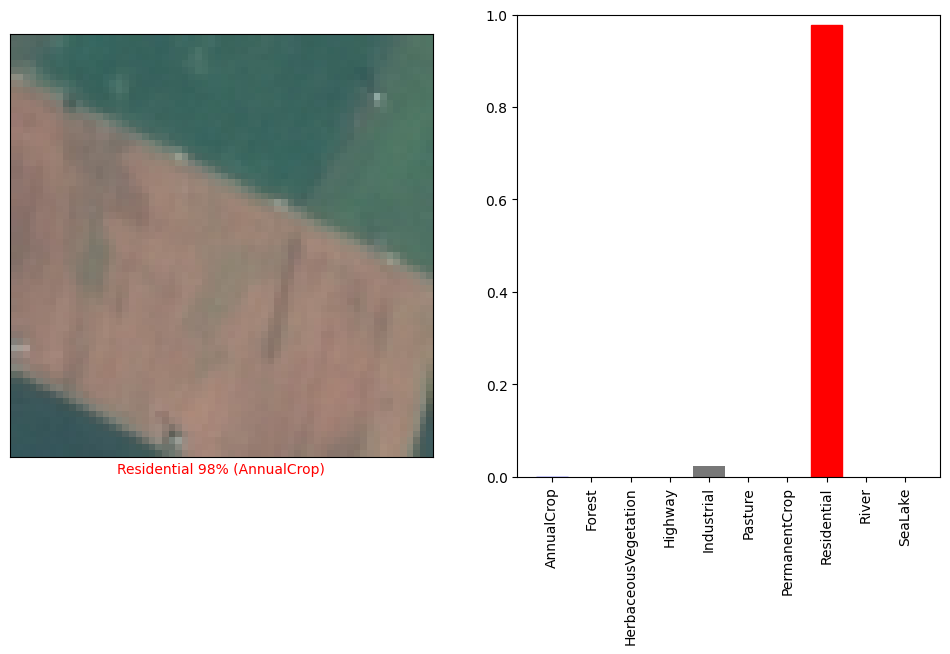



===================== IMAGEN INCORRECTA Nº1524 =====================

LA LISTA DE PROBABILIDADES DE SER CADA ELEMENTO ES:
[2.45688647e-01 6.14737213e-01 2.98459828e-02 1.58686191e-03
 4.30951222e-05 6.55235425e-02 1.57391913e-02 1.09764354e-04
 1.76837333e-02 9.04188305e-03]

ESTE MODELO ESTIMA QUE LA IMAGEN 1524 CORRESPONDE AL ELEMENTO Nº 1: Forest


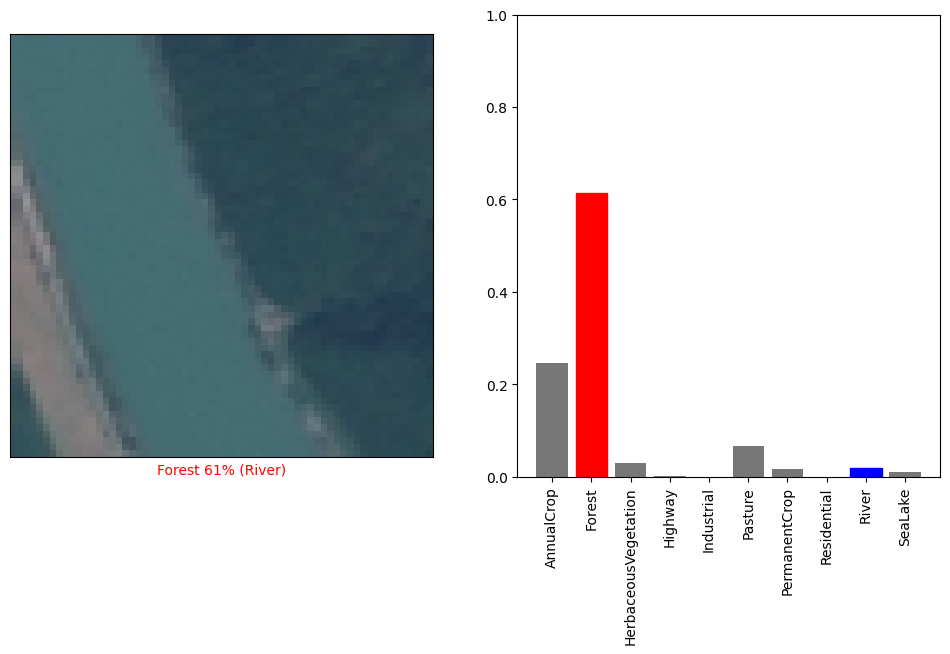



===================== IMAGEN INCORRECTA Nº36 =====================

LA LISTA DE PROBABILIDADES DE SER CADA ELEMENTO ES:
[4.3888399e-01 4.4604729e-08 2.6915607e-06 1.1481605e-03 3.6819176e-06
 1.4195165e-06 6.0454463e-06 4.2354222e-09 5.5991578e-01 3.8181584e-05]

ESTE MODELO ESTIMA QUE LA IMAGEN 36 CORRESPONDE AL ELEMENTO Nº 8: River


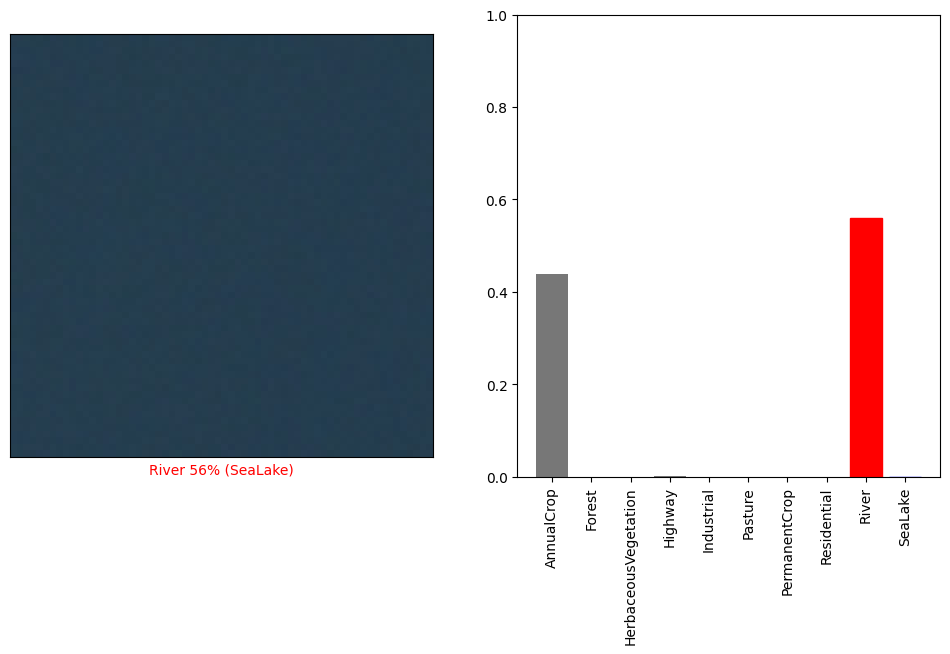



===================== IMAGEN INCORRECTA Nº373 =====================

LA LISTA DE PROBABILIDADES DE SER CADA ELEMENTO ES:
[7.6458440e-04 7.4397212e-01 1.1518036e-02 7.5964614e-05 5.3134255e-07
 1.6543093e-01 9.4075809e-04 2.1627997e-05 7.6740459e-02 5.3494191e-04]

ESTE MODELO ESTIMA QUE LA IMAGEN 373 CORRESPONDE AL ELEMENTO Nº 1: Forest


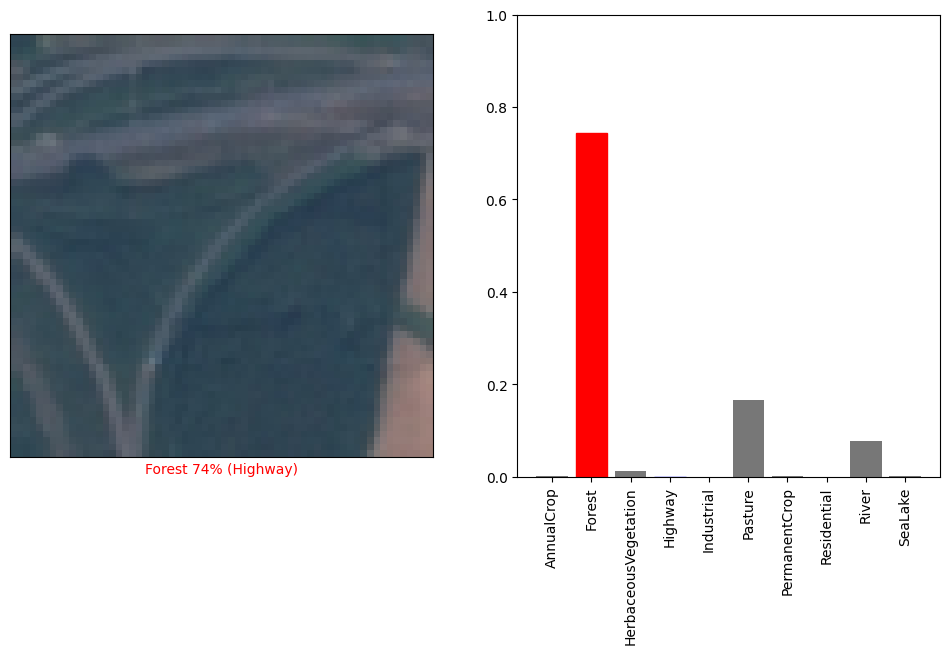



===================== IMAGEN INCORRECTA Nº2145 =====================

LA LISTA DE PROBABILIDADES DE SER CADA ELEMENTO ES:
[2.6928949e-06 1.2390133e-08 3.2017711e-01 9.1323685e-03 1.2608029e-01
 3.9170855e-06 9.3683749e-03 5.3519011e-01 4.2474272e-05 2.6220137e-06]

ESTE MODELO ESTIMA QUE LA IMAGEN 2145 CORRESPONDE AL ELEMENTO Nº 7: Residential


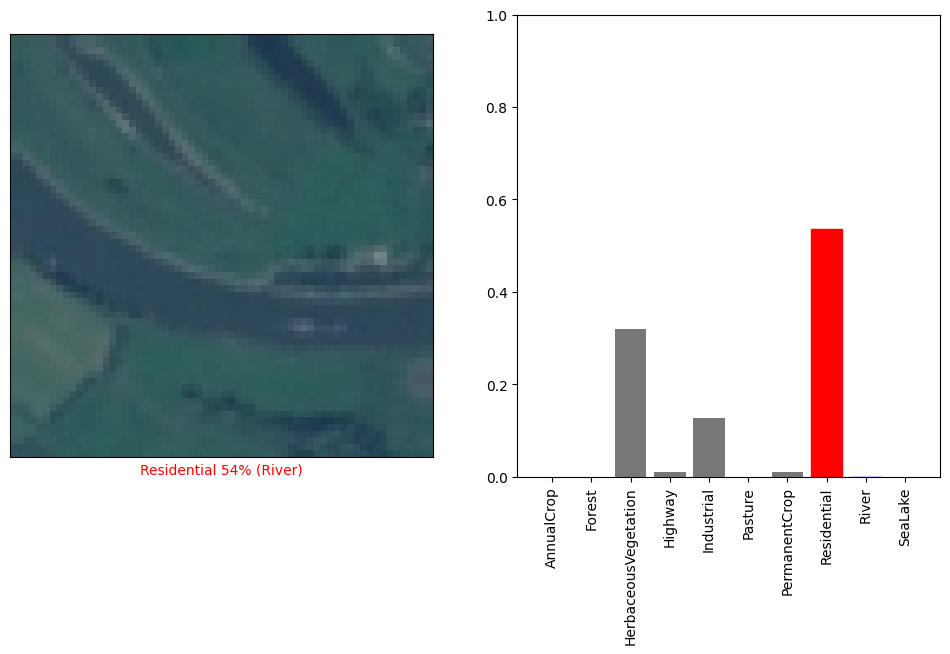



===================== IMAGEN INCORRECTA Nº1031 =====================

LA LISTA DE PROBABILIDADES DE SER CADA ELEMENTO ES:
[2.4228457e-03 7.8789830e-01 9.0438174e-04 1.0688067e-05 8.0491662e-07
 5.6885561e-04 2.1678961e-05 6.2491999e-06 8.2632461e-05 2.0808350e-01]

ESTE MODELO ESTIMA QUE LA IMAGEN 1031 CORRESPONDE AL ELEMENTO Nº 1: Forest


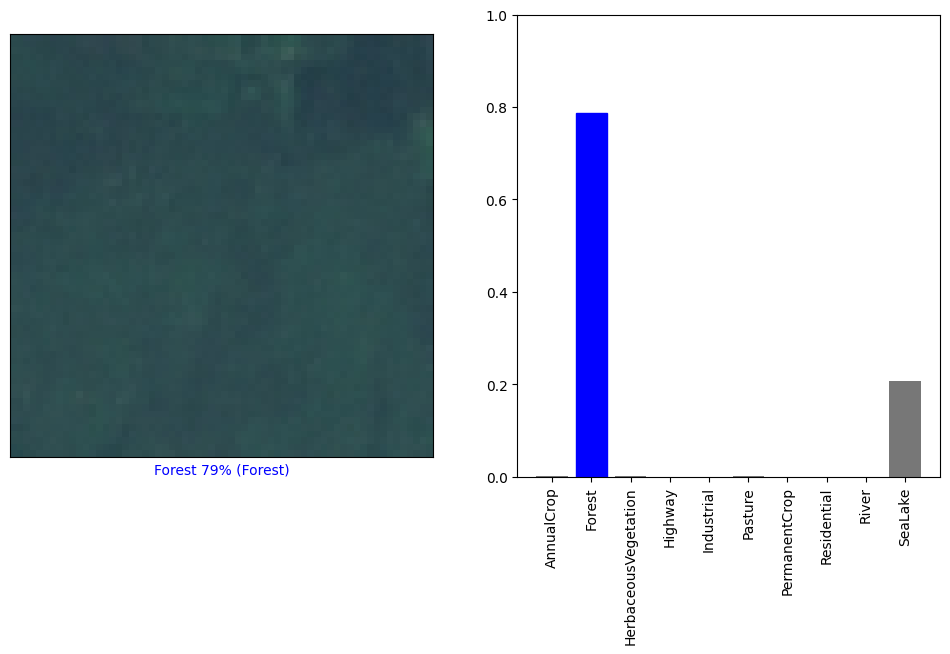



===================== IMAGEN INCORRECTA Nº1943 =====================

LA LISTA DE PROBABILIDADES DE SER CADA ELEMENTO ES:
[1.2446938e-01 8.6024592e-08 1.9670009e-04 5.6216899e-02 4.3970643e-04
 4.0186732e-03 8.0188608e-01 1.0403488e-05 1.2761844e-02 1.7437441e-07]

ESTE MODELO ESTIMA QUE LA IMAGEN 1943 CORRESPONDE AL ELEMENTO Nº 6: PermanentCrop


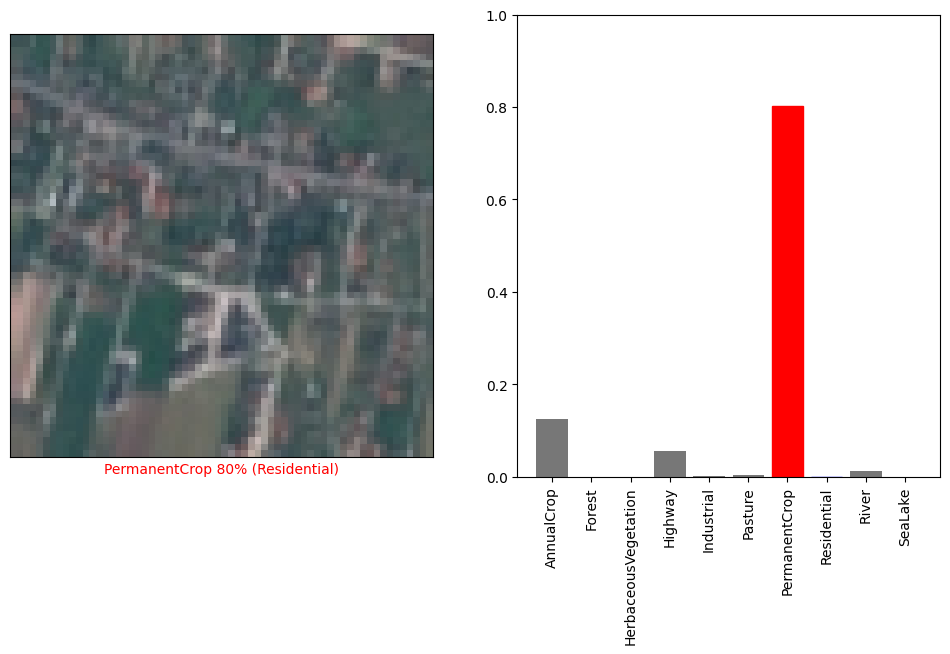



===================== IMAGEN INCORRECTA Nº380 =====================

LA LISTA DE PROBABILIDADES DE SER CADA ELEMENTO ES:
[1.53913628e-04 5.72603653e-07 1.08675085e-01 2.50463048e-03
 1.18377582e-04 1.88540260e-04 8.88091505e-01 2.47801945e-04
 1.89688635e-05 5.04778086e-07]

ESTE MODELO ESTIMA QUE LA IMAGEN 380 CORRESPONDE AL ELEMENTO Nº 6: PermanentCrop


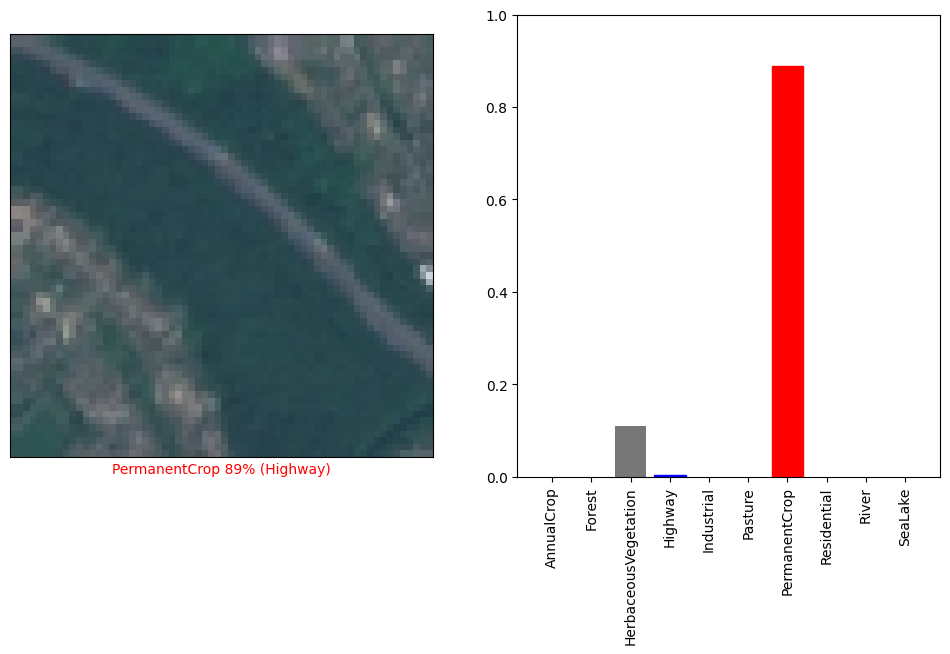



===================== IMAGEN INCORRECTA Nº2269 =====================

LA LISTA DE PROBABILIDADES DE SER CADA ELEMENTO ES:
[5.3775912e-05 1.3028333e-06 2.2347148e-01 2.2717180e-02 1.1564671e-01
 1.5139102e-05 5.4054419e-03 6.3073945e-01 1.8748083e-03 7.4694435e-05]

ESTE MODELO ESTIMA QUE LA IMAGEN 2269 CORRESPONDE AL ELEMENTO Nº 7: Residential


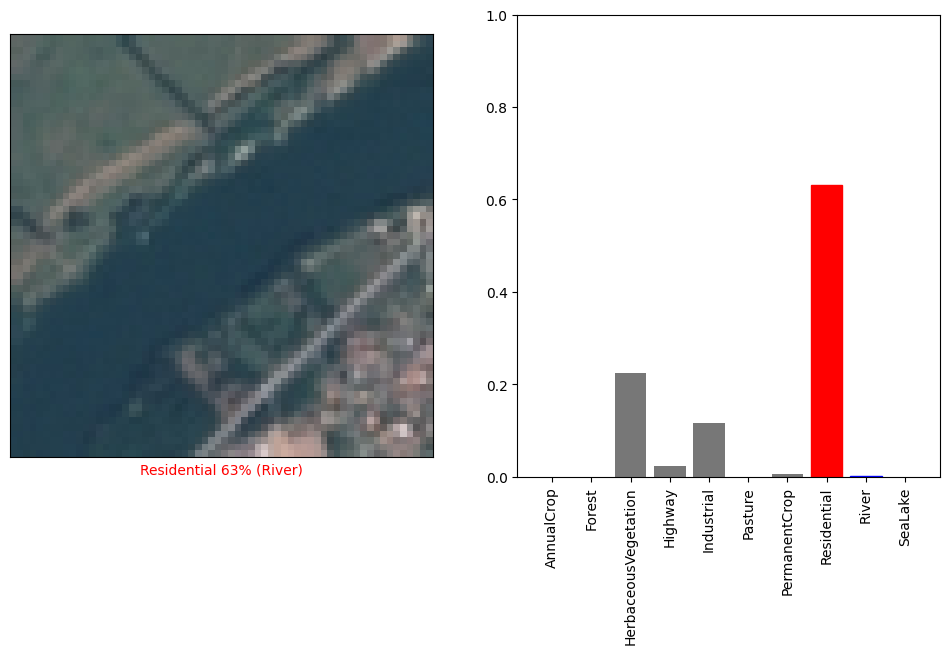



===================== IMAGEN INCORRECTA Nº1798 =====================

LA LISTA DE PROBABILIDADES DE SER CADA ELEMENTO ES:
[3.5501853e-01 2.6839007e-06 6.8128087e-02 1.3922481e-01 7.8945793e-04
 1.2486591e-03 3.3971903e-01 1.2878474e-04 9.5701940e-02 3.8023540e-05]

ESTE MODELO ESTIMA QUE LA IMAGEN 1798 CORRESPONDE AL ELEMENTO Nº 0: AnnualCrop


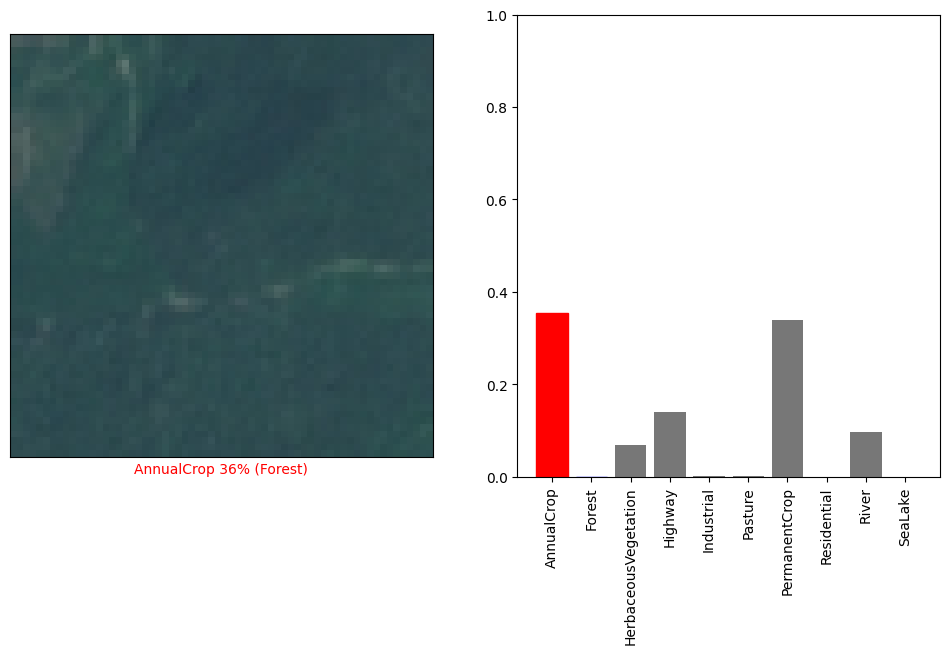



===================== IMAGEN CORRECTA Nº1824 ======================

LA LISTA DE PROBABILIDADES DE SER CADA ELEMENTO ES:
[4.5232253e-05 1.9792900e-04 4.6716927e-05 2.1673250e-04 6.0921116e-07
 9.9576712e-01 3.6659639e-04 6.9571448e-05 3.2893205e-03 2.7540676e-07]

ESTE MODELO ESTIMA QUE LA IMAGEN 1824 CORRESPONDE AL ELEMENTO Nº 5: Pasture


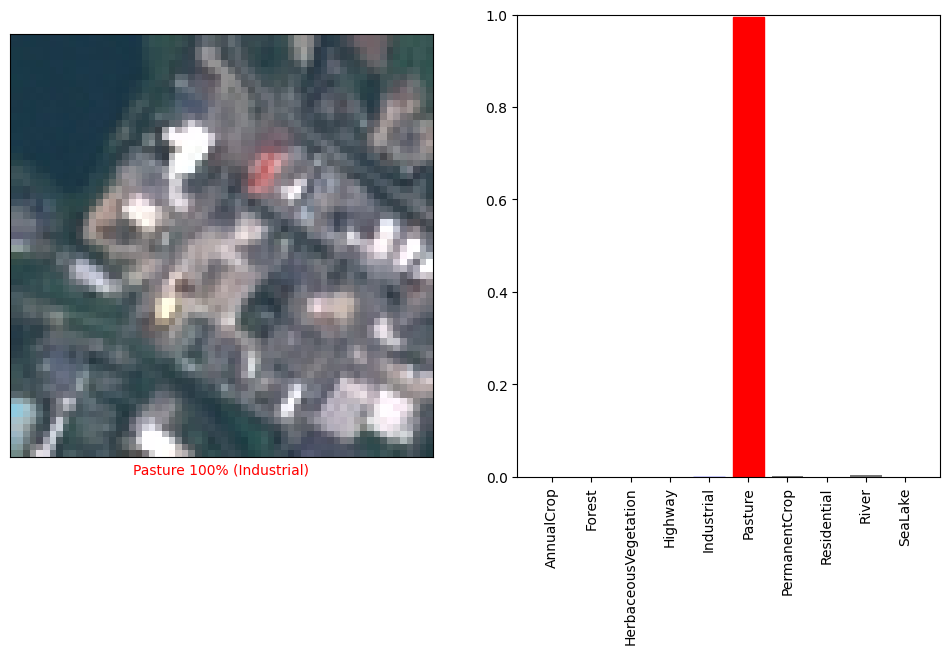



===================== IMAGEN CORRECTA Nº1025 ======================

LA LISTA DE PROBABILIDADES DE SER CADA ELEMENTO ES:
[9.9985957e-01 2.0823458e-14 1.1041957e-09 9.4070630e-05 1.4488982e-06
 3.1354276e-08 5.1841334e-06 5.0809740e-10 3.9599381e-05 6.3253111e-08]

ESTE MODELO ESTIMA QUE LA IMAGEN 1025 CORRESPONDE AL ELEMENTO Nº 0: AnnualCrop


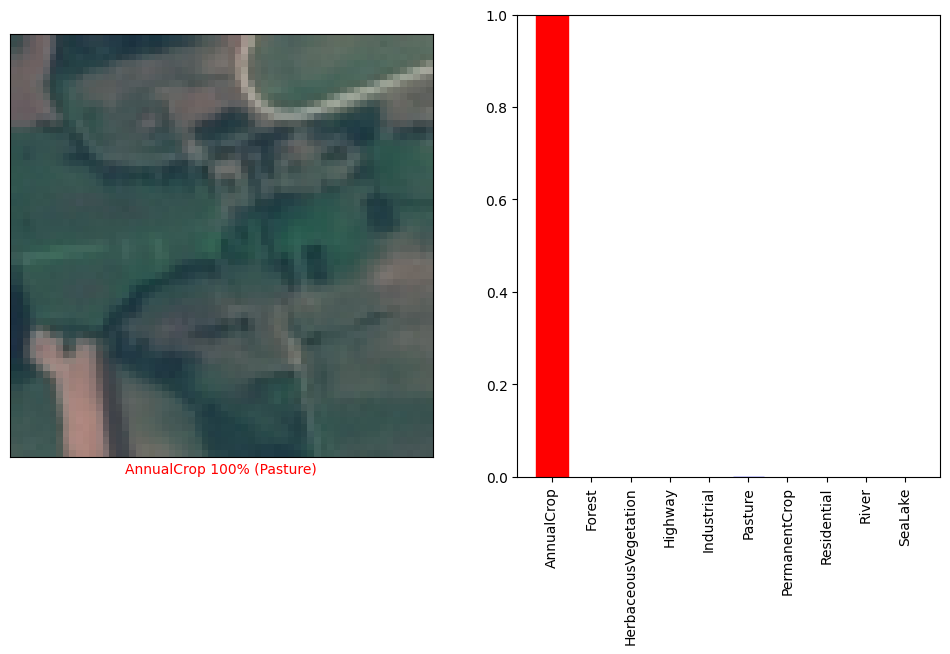



===================== IMAGEN CORRECTA Nº1486 ======================

LA LISTA DE PROBABILIDADES DE SER CADA ELEMENTO ES:
[3.42935848e-04 5.08065386e-06 9.64812443e-07 1.54392160e-06
 6.44824922e-07 1.80091258e-04 1.27205695e-08 2.42797910e-07
 1.50887099e-05 9.99453366e-01]

ESTE MODELO ESTIMA QUE LA IMAGEN 1486 CORRESPONDE AL ELEMENTO Nº 9: SeaLake


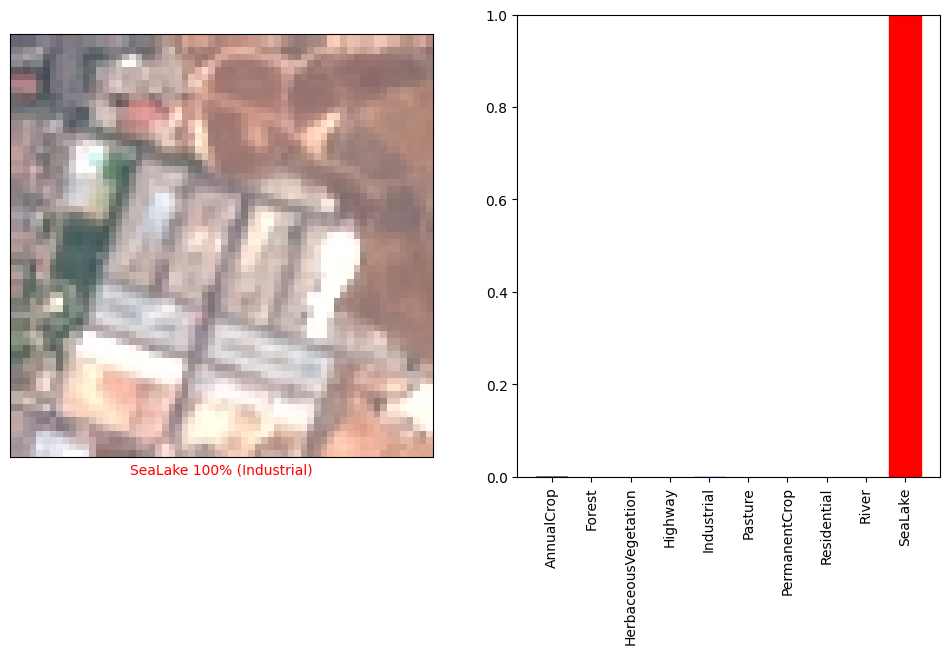



===================== IMAGEN CORRECTA Nº1015 ======================

LA LISTA DE PROBABILIDADES DE SER CADA ELEMENTO ES:
[4.3858552e-05 9.9979895e-01 2.2588795e-06 1.4213265e-07 1.7904832e-09
 4.3178166e-05 2.4007622e-07 1.6145716e-08 1.5126523e-05 9.6308657e-05]

ESTE MODELO ESTIMA QUE LA IMAGEN 1015 CORRESPONDE AL ELEMENTO Nº 1: Forest


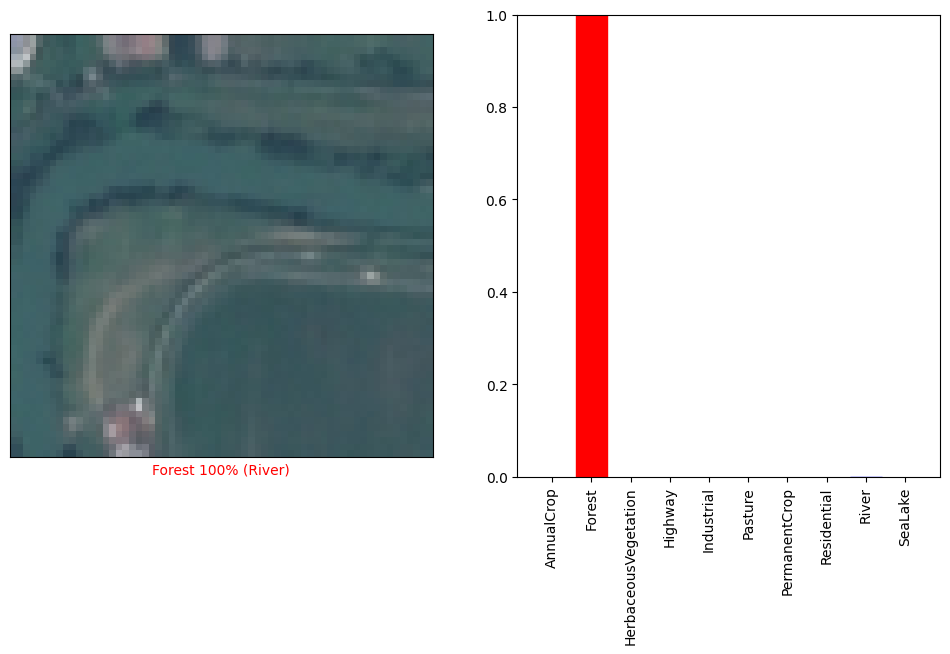



===================== IMAGEN CORRECTA Nº722 ======================

LA LISTA DE PROBABILIDADES DE SER CADA ELEMENTO ES:
[2.3977148e-10 7.4628275e-17 2.4001724e-06 2.9172346e-05 9.9994087e-01
 2.6479898e-11 9.4213540e-08 2.7224492e-05 2.2389555e-07 2.7545062e-09]

ESTE MODELO ESTIMA QUE LA IMAGEN 722 CORRESPONDE AL ELEMENTO Nº 4: Industrial


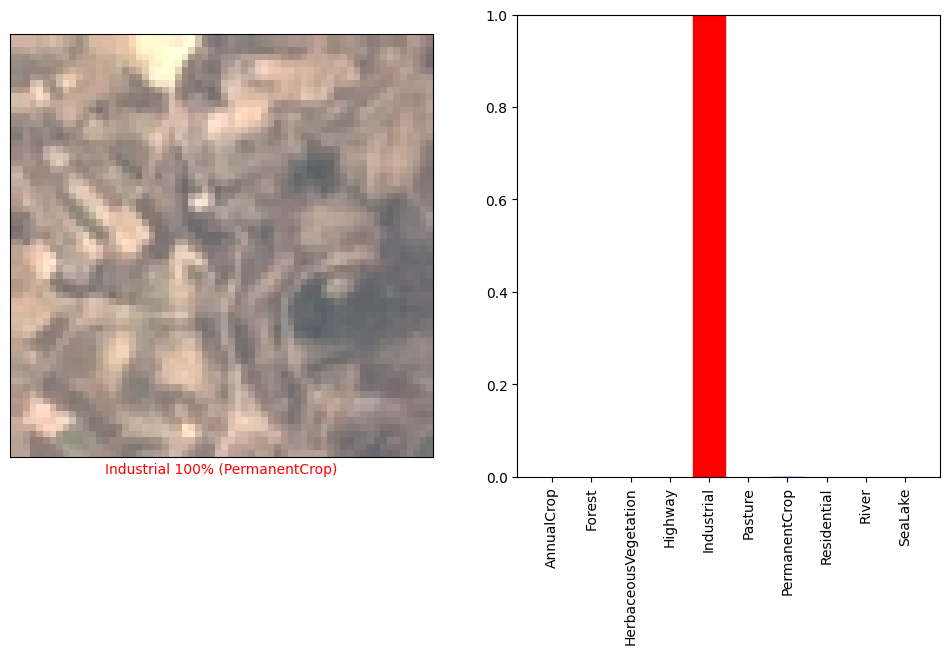

In [62]:
# Selecciona al azar 10 imágenes incorrectas y 2 correctas
random_incorrect_indices = random.sample(incorrect_indices, 10)
random_correct_indices = random.sample(correct_indices, 5)

# Visualiza las imágenes incorrectas
for k in random_incorrect_indices:
    print("\n\n=================================================================")
    print(f"===================== IMAGEN INCORRECTA Nº{k+1} =====================")
    predicciones(predictions, k, label_names)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plot_image(k, predictions, test_labels, test_images, label_names)
    plt.subplot(1,2,2)
    plot_value_array(predictions, k, test_labels, label_names)
    plt.show()

# Visualiza las imágenes correctas
for k in random_correct_indices:
    print("\n\n=================================================================")
    print(f"===================== IMAGEN CORRECTA Nº{k+1} ======================")
    predicciones(predictions, k, label_names)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plot_image(k, predictions, test_labels, test_images, label_names)
    plt.subplot(1,2,2)
    plot_value_array(predictions, k, test_labels, label_names)
    plt.show()


### **TRABAJO FUTURO**

Podemos considerar que el trabajo esta finalizado, sin embargo, es un cominezo hacia un modelo bien detallado y útil para nuestro dia a dia. Para ello, tenemos que destacar que hay grandes avances que haran de este modelo algo plenamente util. Hemos hecho un trabajo de investigacion para poder encontrar nuevas mejoras que podremos implementar de cara al futuro.

- **Análisis de Errores**: Realizar un estudio exhaustivo de los errores de clasificación para identificar patrones comunes o casos atípicos, lo que podría revelar valiosas perspectivas sobre las limitaciones del modelo actual y cómo superarlas.

- **Aplicaciones Prácticas**: Desarrollar un protocolo para probar el modelo en un entorno real con datos en tiempo real, colaborando con expertos en teledetección para evaluar y mejorar la utilidad práctica del modelo.

- **Comparación con Otros Conjuntos de Datos**: Ampliar la validación del modelo a otros conjuntos de datos satelitales, especialmente aquellos con diferentes resoluciones o características espectrales, para evaluar su versatilidad y adaptabilidad.

- **Integración de Datos Multifuente**: Considerar la incorporación de otras fuentes de datos, como datos meteorológicos o geográficos, para enriquecer el modelo y mejorar su capacidad predictiva.

### **CONCLUSIÓN.**

Este proyecto se ha enfocado como una aportación en el ámbito de la teledetección, demostrando un gran potencial para mejorar la manera en que interpretamos y utilizamos los datos satelitales. La implementación de técnicas de aprendizaje profundo y la exploración intensa de las redes neuronales convolucionales han constituido un enfoque avanzado en la tarea de clasificación de imágenes. No obstante, es en los resultados y métricas de rendimiento donde realmente esta la evaluación del éxito y la precisión de este proyecto.

A lo largo de la evolución del modelo, se han registrado méritos notables, especialmente evidenciados en la iteración y refinamiento continuo, culminando en el desarrollo del Modelo Final. Este modelo ha integrado ajustes significativos. Estas mejoras no son solo un intento de mejorar la precisión y la eficacia sino también una manifestación de una comprensión profunda de la naturaleza compleja de las imágenes satelitales.

La relevancia práctica de estas mejoras no es menor. La capacidad de clasificar con precisión y eficiencia imágenes satelitales tiene implicaciones directas y significativas en áreas críticas como la monitorización ambiental y la gestión de recursos naturales. Al mejorar la precisión y eficacia de estos modelos, este proyecto contribuye de manera directa a mejorar la toma de decisiones informadas en estos campos, basadas en datos más precisos y detallados.

Por resumir, este proyecto no solo ha logrado avances técnicos en la clasificación de imágenes satelitales, sino que también ha establecido las bases para aplicaciones prácticas que pueden mejorar de manera significativa la forma en que interactuamos y respondemos a nuestro entorno.